Get pair-wise correlations between binned condensability scores

In [1]:
# python modules
import random
import glob
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
# custom modules
import graphics_edit as graphics

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
# custom modules
import load_file_edit as load_file

In [5]:
path = "./data/"

In [6]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'E14':'mouse',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'E14':['chr%s' % (i) for i in range(1, 20)] + ['chrX', 'chrY'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}

In [7]:
### set data information (fname/field) and key
path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/'

#dinfo_dkey = {'E14_NCP_sp_1rep_10kb_score_table.gtab.gz':
-#              {'E14_NCP_sp_%d_1rep' % (i) :(1, 'E14', 'score', i) for i in range(1, 10)},
#              'E14_NCP_sp_2rep_10kb_score_table.gtab.gz':
#              {'E14_NCP_sp_%d_2rep' % (i) :(2, 'E14', 'score', i) for i in range(1, 10)},
#              }

dinfo_dkey = {'mCD8T:WT_NCP_sp_%d_1rep_10kb_bin.gtab.gz' % (i):
              {'mCD8T:WT_NCP_sp_%d_1rep' % (i):(1, 'mCD8T:WT', 'count', i)} for i in range(10)
              }
dinfo_dkey.update({'E14_NCP_sp_%d_1rep_10kb_bin.gtab.gz' % (i):
                   {'E14_NCP_sp_%d_1rep' % (i):(1, 'E14', 'count', i)} for i in range(10)
                   })
dinfo_dkey.update({'E14_NCP_sp_1rep_10kb_score_table.gtab.gz':{'ATcontent':'ATcontent'}})

In [8]:
### load gtab file
dkey_ID_value = {}
for fkey in dinfo_dkey:
    field_dkey = dinfo_dkey[fkey]
    for fname in glob.glob(path + '*'):
        if not re.match(fkey, fname.rsplit('/')[-1]):
            continue
        print "loading %s" % (fname.rsplit('/')[-1])
        field_ID_value = load_file.read_gtab(fname,
                                             field_choices=field_dkey.keys(),
                                             mode='col',
                                             skip_nan=True)
        for field, dkey in field_dkey.items():
            ID_value = field_ID_value[field]
            if dkey not in dkey_ID_value:
                dkey_ID_value[dkey] = {}
            dkey_ID_value[dkey].update(ID_value)

loading mCD8T:WT_NCP_sp_6_1rep_10kb_bin.gtab.gz


loading mCD8T:WT_NCP_sp_3_1rep_10kb_bin.gtab.gz


loading mCD8T:WT_NCP_sp_9_1rep_10kb_bin.gtab.gz


loading mCD8T:WT_NCP_sp_7_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_8_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_5_1rep_10kb_bin.gtab.gz


loading mCD8T:WT_NCP_sp_4_1rep_10kb_bin.gtab.gz


loading mCD8T:WT_NCP_sp_1_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_9_1rep_10kb_bin.gtab.gz


loading mCD8T:WT_NCP_sp_8_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_0_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_1rep_10kb_score_table.gtab.gz


loading E14_NCP_sp_7_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_4_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_1_1rep_10kb_bin.gtab.gz


loading mCD8T:WT_NCP_sp_0_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_3_1rep_10kb_bin.gtab.gz


loading mCD8T:WT_NCP_sp_2_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_2_1rep_10kb_bin.gtab.gz


loading E14_NCP_sp_6_1rep_10kb_bin.gtab.gz


loading mCD8T:WT_NCP_sp_5_1rep_10kb_bin.gtab.gz


In [9]:
### get common IDs
ID_list = set([])
dkeys = dkey_ID_value.keys()
for i in range(len(dkeys)):
    dkey = dkeys[i]
    if i == 0:
        ID_list |= set(dkey_ID_value[dkey].keys())
        continue
    ID_list &= set(dkey_ID_value[dkey].keys())
ID_list = sorted(list(ID_list))
    

(1, 'mCD8T:WT', 'count', 0)
(1, 'mCD8T:WT', 'count', 1)
0.69



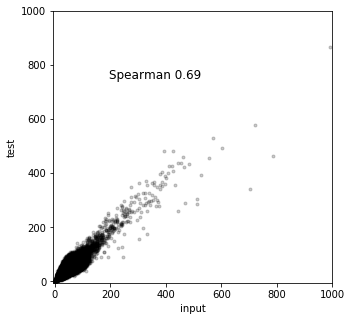

(1, 'mCD8T:WT', 'count', 0)
(1, 'mCD8T:WT', 'count', 2)
0.75



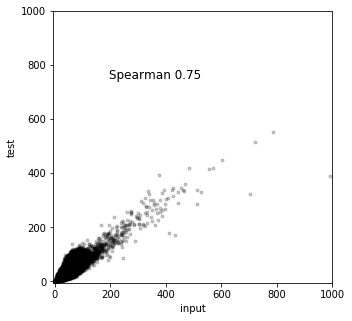

(1, 'mCD8T:WT', 'count', 0)
(1, 'mCD8T:WT', 'count', 3)
0.73



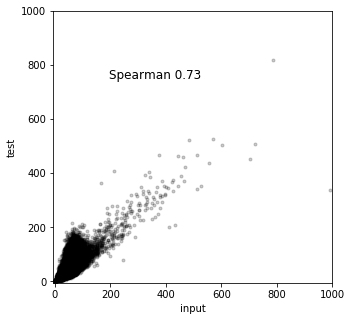

(1, 'mCD8T:WT', 'count', 0)
(1, 'mCD8T:WT', 'count', 4)
0.72



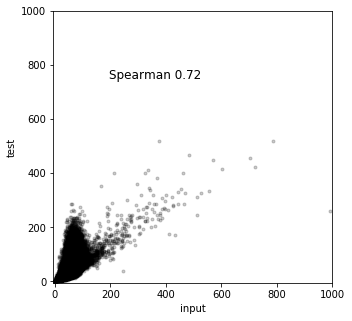

(1, 'mCD8T:WT', 'count', 0)
(1, 'mCD8T:WT', 'count', 5)
0.63



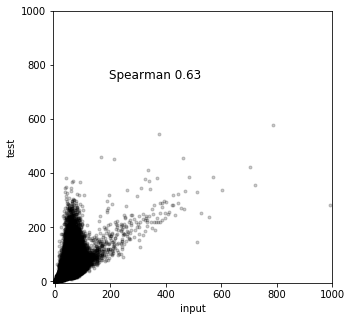

(1, 'mCD8T:WT', 'count', 0)
(1, 'mCD8T:WT', 'count', 6)
0.68



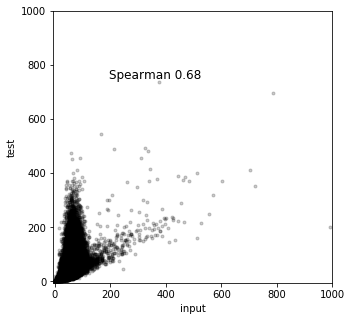

(1, 'mCD8T:WT', 'count', 0)
(1, 'mCD8T:WT', 'count', 7)
0.68



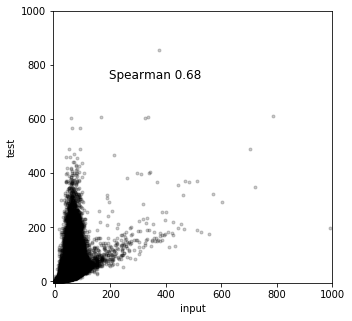

(1, 'mCD8T:WT', 'count', 0)
(1, 'mCD8T:WT', 'count', 8)
0.68



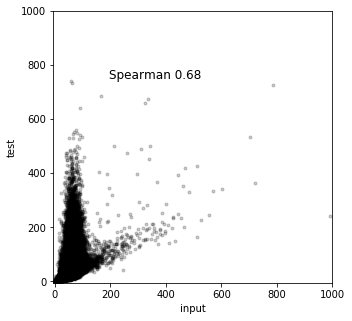

(1, 'mCD8T:WT', 'count', 0)
(1, 'mCD8T:WT', 'count', 9)
0.66



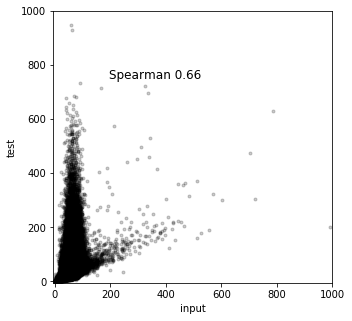

(1, 'E14', 'count', 0)
(1, 'E14', 'count', 1)
0.91



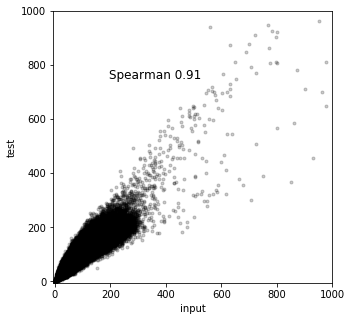

(1, 'E14', 'count', 0)
(1, 'E14', 'count', 2)
0.92



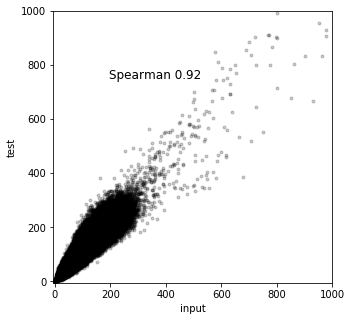

(1, 'E14', 'count', 0)
(1, 'E14', 'count', 3)
0.91



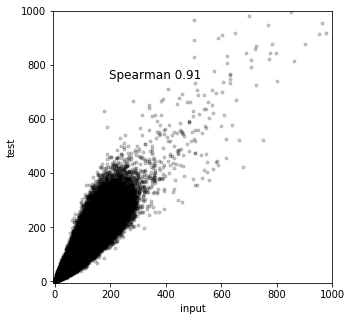

(1, 'E14', 'count', 0)
(1, 'E14', 'count', 4)
0.89



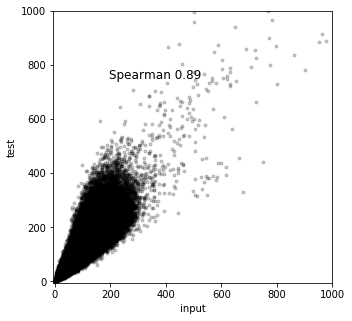

(1, 'E14', 'count', 0)
(1, 'E14', 'count', 5)
0.87



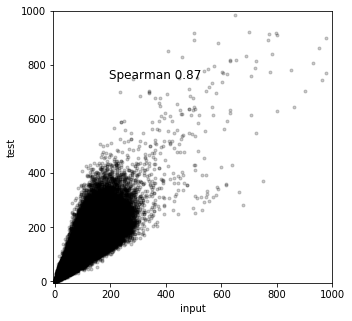

(1, 'E14', 'count', 0)
(1, 'E14', 'count', 6)
0.88



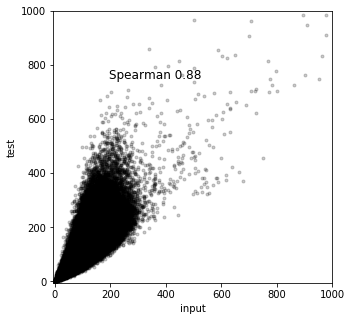

(1, 'E14', 'count', 0)
(1, 'E14', 'count', 7)
0.87



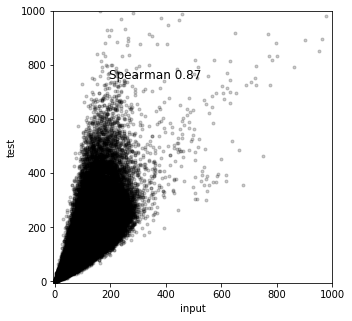

(1, 'E14', 'count', 0)
(1, 'E14', 'count', 8)
0.86



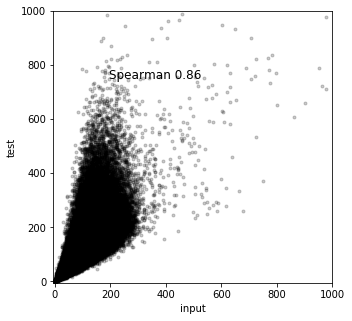

(1, 'E14', 'count', 0)
(1, 'E14', 'count', 9)
0.59



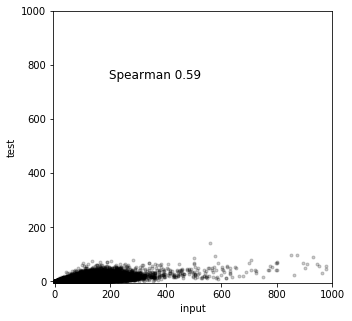

In [11]:
# check correlation bewteen input vs test
cells = ['mCD8T:WT', 'E14']
reps = [1]
for rep in reps:
    for cell in cells:
        for i in range(1, 10):
            dkey1 = (rep, cell, 'count', 0)
            dkey2 = (rep, cell, 'count', i)

            X, Y = [], []
            for ID in ID_list:
                X.append(dkey_ID_value[dkey1][ID])
                Y.append(dkey_ID_value[dkey2][ID])

            corr = scipy.stats.spearmanr(X, Y)[0]
            #corr = scipy.stats.pearsonr(X, Y)[0]
            #print "%d-%s-%s-%s-%d" % exp1
            #print "%d-%s-%s-%s-%d" % exp2
            print dkey1
            print dkey2
            print "%1.2f" % (corr)
            print 
            #print ("%s VS %s: %1.2f" % (agent1, agent2, corr))

            fig, ax = plt.subplots(figsize=(5, 5))
            plt.plot(X, Y, 'k.', alpha=0.2)
            #graphics.density_scatter (X,
            #                          Y,
            #                          xlim=[0, 100],
            #                          ylim=[0, 100],
            #                          ax=ax)
            plt.annotate("Spearman %1.2f" % (corr),
                         xy=(0.2, 0.75),
                         fontsize=12,
                         xycoords='axes fraction')

            #plt.title("%s VS %s" % (agent, agent2))
            #plt.xlabel("fold change (%d-%s-%s-%s-%d)" % exp1)
            #plt.ylabel("fold change (%d-%s-%s-%s-%d)" % exp2)
            #plt.xscale('log', base=2)
            #plt.yscale('log', base=2)

            plt.xlabel('input')
            plt.ylabel('test')

            plt.xlim([-5,1000])
            plt.ylim([-5,1000])
            #plt.savefig('corr_%d.png' % (i), dpi=300)
            plt.show()
            plt.close()
        